<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject #09</div>
<span style="">MicroProject: Valentine's Day</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/09-valentines-day/">https://discovery.cs.illinois.edu/microproject/09-valentines-day/</a></div>
</h1>

<hr style="color: #DD3403;">

# Data Source: The National Retail Federation


NRF (National Retail Federation) is the world's largest retail trade association. Its members include department stores, specialty, discount, catalog, Internet, and independent retailers, chain restaurants, grocery stores, and multi-level marketing companies. NRF has surveyed consumers about how they plan to celebrate Valentine’s Day annually for over a decade. This includes consumer spending, gifts purchased, and more! To learn more about the data visit [NRF's website](https://nrf.com/research-insights/holiday-data-and-trends/valentines-day)

## Importing the NRF Valentine's Day Dataset

The National Retail Federation dataset is included as part of this MicroProject as `valentines_day.csv`.  Import the `valentines_day.csv` into this notebook by reading the CSV into a new DataFrame called `df`:

In [1]:
# Import the Valentine's Day dataset:
import pandas as pd
df = pd.read_csv("valentines_day.csv")

In [2]:
## == TEST CASES for Data Import ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert("df" in vars()), "Make sure to name the DataFrame df"
assert(len(df) == 13), "Make sure you read in the correct csv"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 1: Exploratory Data Analysis

Before doing any analysis, let's explore the data.  Use `df.columns` to display the columns in the dataset:

In [3]:
df.columns

Index(['Year', 'Candy Percentage', 'Flowers Percentage', 'Jewelry Percentage',
       'Greeting cards Percentage', 'An evening out Percentage',
       'Clothing Percentage', 'Gift cards Percentage', 'Candy Total',
       'Flowers Total', 'Jewelry Total', 'Greeting cards Total',
       'An evening out Total', 'Clothing Total', 'Gift cards Total',
       'Candy Average Spent', 'Flowers Average Spent', 'Jewelry Average Spent',
       'Greeting cards Average Spent', 'An evening out Average Spent',
       'Clothing Average Spent', 'Gift cards Average Spent',
       'Per person Expected Valentines Day Spend'],
      dtype='object')

Next, use `df.head()` to explore the first few rows of data:

In [4]:
df.head()

,Year,Candy Percentage,Flowers Percentage,Jewelry Percentage,Greeting cards Percentage,An evening out Percentage,Clothing Percentage,Gift cards Percentage,Candy Total,Flowers Total,...,Clothing Total,Gift cards Total,Candy Average Spent,Flowers Average Spent,Jewelry Average Spent,Greeting cards Average Spent,An evening out Average Spent,Clothing Average Spent,Gift cards Average Spent,Per person Expected Valentines Day Spend
0,2010,47%,36%,15%,55%,36%,14%,11%,1200000000,1700000000,...,1500000000,1200000000,8.60,12.33,21.52,5.91,23.76,10.93,8.42,103.00
1,2011,48%,34%,17%,52%,35%,14%,13%,1500000000,1700000000,...,1600000000,1500000000,10.75,12.62,26.18,8.09,24.86,12.00,11.21,116.21
2,2012,51%,36%,19%,52%,36%,15%,13%,1500000000,1900000000,...,1500000000,1200000000,10.85,13.49,29.60,6.93,25.66,10.42,8.43,126.03
3,2013,51%,37%,20%,55%,36%,16%,15%,1700000000,1900000000,...,1600000000,1500000000,11.64,13.48,30.94,8.32,27.93,11.46,10.23,130.97
4,2014,49%,37%,19%,51%,37%,16%,14%,1400000000,1900000000,...,1700000000,1200000000,10.80,15.00,30.58,7.97,27.48,13.37,9.00,133.91


## Puzzle 1.1: Setting a custom index column

By default, pandas will **default the index column to a numeric index starting with 0**.  However, if one value is uniquely descriptive of the entire row, we may want to use that custom index instead.

Since the `Year` column is descriptive of all the data in each row, let's set the `Year` as the index of the DataFrame.  To set an index on a DataFrame, update the DataFrame by using the DataFrame function `df.set_index(index_column_name)` where we replace `index_column_name` with the name of our index.  For example:

```
df = df.set_index("column_name")
```

Set the index to be the `Year` column:

In [5]:
# Set the index of the DataFrame df to the "Year" columns:
df = df.set_index('Year')

In [6]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(df.iloc[0,0] == "47%"), "Make sure the \"Year\" column is set as the index"
assert(df.shape[1] == 22), "Make sure the \"Year\" column is set as the index"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Finding the Total Amount Spent Each Year

Using your list of column names you found earlier, calculate the total amount spent on valentines day each year by summing up all columns that end in the word "Total" (ex: "Candy Total", "Flowers Total", etc).

Add this total spending per year data to a new column called `Total Spending` in your DataFrame `df`.

In [9]:
df["Total Spending"] = df["Candy Total"] +df["Flowers Total"] + df["Jewelry Total"] + df["Clothing Total"] + df["Gift cards Total"] + df["An evening out Total"] + df["Greeting cards Total"]
df["Total Spending"]

Year
2010    12700000000
2011    14300000000
2012    14800000000
2013    16300000000
2014    14600000000
2015    16700000000
2016    17500000000
2017    16100000000
2018    16500000000
2019    15400000000
2020    21000000000
2021    16800000000
2022    21200000000
Name: Total Spending, dtype: int64

## Puzzle 1.3: Finding the year where the most money was spent

Using the `"Total Spending"` column you just made, find the year that had the largest spending and store it in a DataFrame called, `df_largest_total`

In [13]:
df_largest_total = df.nlargest(1, "Total Spending")
df_largest_total

,Candy Percentage,Flowers Percentage,Jewelry Percentage,Greeting cards Percentage,An evening out Percentage,Clothing Percentage,Gift cards Percentage,Candy Total,Flowers Total,Jewelry Total,...,Gift cards Total,Candy Average Spent,Flowers Average Spent,Jewelry Average Spent,Greeting cards Average Spent,An evening out Average Spent,Clothing Average Spent,Gift cards Average Spent,Per person Expected Valentines Day Spend,Total Spending
Year,,,,,,,,,,,,,,,,,,,,,
2022,56%,37%,22%,40%,31%,22%,21%,2200000000,2300000000,6200000000,...,2300000000,15.9,16.71,45.75,7.47,31.35,21.46,17.22,175.41,21200000000


In [14]:
## == TEST CASES for Puzzle 1.2 and 1.3==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert('Total Spending' in df), "Make sure you've named the Total Spending column properly and added it to the dataframe"
assert(df['Total Spending'].iloc[0] == 12700000000), "Double check the values of your Total Spending column"
assert(df_largest_total.iloc[0,0] == "56%"), "Make sure you correctly selected the row with the largest total spending"
assert(df_largest_total.index[0] == 2022), "Make sure you correctly selected the row with the largest total spending"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

# Part 2: Descriptive Statistics

Calculate the **mean** for the total spent on flowers into the variable `flowers_mean`

In [15]:
flowers_mean = df["Flowers Total"].mean()
flowers_mean

1976923076.9230769

Calculate the **mode** for the total spent on clothing into the variable `clothing_mode`

In [21]:
clothing_mode = df["Clothing Total"].mode()
clothing_mode

0    1500000000
1    1600000000
2    1900000000
3    2000000000
4    2900000000
Name: Clothing Total, dtype: int64

Calculate the **median** for the total spent on candy into the variable `candy_median`

In [26]:
candy_median = df["Candy Total"].median()
candy_median

1700000000.0

Calculate the **standard deviation** for the total spent on jewelry and save into the variable `jewelry_std`

In [24]:
jewelry_std = df["Jewelry Total"].std()
jewelry_std

861647200.0975211

In [27]:
## == TEST CASES for Puzzle 1.2 and 1.3==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math

assert(flowers_mean == df["Flowers Total"].sum() / df["Flowers Total"].count()), "Make sure you're using the correct formula to calculate the mean"
assert(clothing_mode[2] == df["Clothing Total"].mode()[2]), "Make sure you're using the correct formula to calculate the mode"
assert(clothing_mode[3] == df["Clothing Total"].mode()[3]), "Make sure you're using the correct formula to calculate the mode"
assert(candy_median == df["Candy Total"].sort_values().iloc[int(len(df["Candy Total"].sort_values())/2)]), "Make sure you're using the correct formula to calculate the median"
assert(math.isclose(jewelry_std, 861647200.097521)), "Make sure you're using the correct formula to calculate the standard deviation"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

# Part 3: Analysis

Use `df.plot.line()` to create a line plot of your data.

- By default, `df.plot.line()` will have use the **index column** as the x-axis.  Since we set that to `"Year"` earlier, we do not need to specify an `x` value and pandas will use our index.
- However, `df.plot.line()` requires a column for the `y` axis.  To specify the column to use, provide the column name as a string to the function as the `y` parameter.

A plot of the total spending on flowers could be created with:

```
df.plot.line("Flowers Total")
```

## Your Turn:

Create a line graph using the `"Per person Expected Valentines Day Spend"` column:

<Axes: xlabel='Per person Expected Valentines Day Spend'>

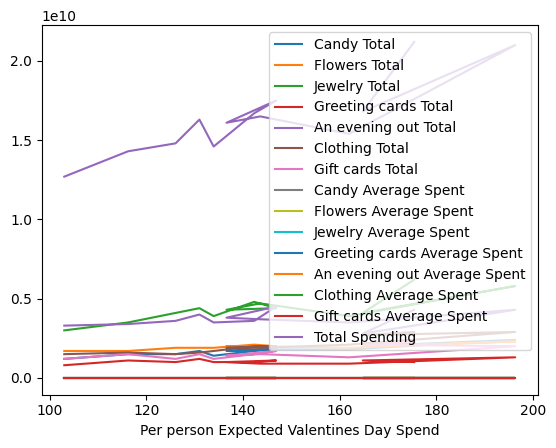

In [31]:
# Create a line plot of expected valentines day spend per person:
import matplotlib
df.plot.line("Per person Expected Valentines Day Spend")

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the instructions to commit and grade this MicroProject!